Versão 1.29

# Notebook de Análise

Este notebook foi criado em colaboração com a Manus Ai para conduzir análises de dados e integrar funcionalidades da Manus AI.

In [1]:
# Importar bibliotecas essenciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import pingouin as pg
output_dir = r"D:\PhD_Jupyter\files\data\analysis"

# Configurações gerais
# %matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from statsmodels.formula.api import ols
import os
# --- Adicionar ANOVA ao Excel ---
try:
    add_analysis_to_excel(writer, 'ANOVA_ARC', anova_arc, "Resultados da ANOVA fatorial 2×2 para ARC", None)
    anova_arc.to_excel(writer, sheet_name='ANOVA_ARC_Raw', index=False)

    add_analysis_to_excel(writer, 'ANOVA_Words', anova_words, "Resultados da ANOVA fatorial 2×2 para Palavras Recordadas", None)
    anova_words.to_excel(writer, sheet_name='ANOVA_Words_Raw', index=False)
except Exception as e:
    print(f"Erro ao adicionar ANOVA ao Excel: {e}")

# Salvar CSV principal
try:
    resultados_analises_phd.to_csv(csv_path, index=False)
    print(f"CSV salvo em {csv_path}")
except Exception as e:
    print(f"Erro ao salvar CSV: {e}")


Erro ao adicionar ANOVA ao Excel: name 'add_analysis_to_excel' is not defined
Erro ao salvar CSV: name 'resultados_analises_phd' is not defined


In [2]:

# --- Adicionar Estatísticas Descritivas ao Excel ---
try:
    add_analysis_to_excel(writer, 'Descritiva_ARC', desc_arc, intro_desc_arc, None, img_path_arc)
    desc_arc.to_excel(writer, sheet_name='Descritiva_ARC_Raw', index=False)
    add_analysis_to_excel(writer, 'Descritiva_Palavras', desc_words, intro_desc_words, None, img_path_words)
    desc_words.to_excel(writer, sheet_name='Descritiva_Palavras_Raw', index=False)
    add_analysis_to_excel(writer, 'Descritiva_BAI', desc_bai, intro_desc_bai, None, img_path_bai)
    desc_bai.to_excel(writer, sheet_name='Descritiva_BAI_Raw', index=False)
    add_analysis_to_excel(writer, 'Descritiva_PANAS', desc_panas, intro_desc_panas, None, img_path_panas)
    desc_panas.to_excel(writer, sheet_name='Descritiva_PANAS_Raw', index=False)
except Exception as e:
    print(f"Erro ao adicionar Descritivas ao Excel: {e}")

# --- Adicionar Verificação de Manipulação ao Excel ---
try:
    add_analysis_to_excel(writer, 'Manip_BAI_Control_Pair', bai_t_paired_control, intro_manip_bai, apa_bai_paired_control)
    bai_t_paired_control.to_excel(writer, sheet_name='Manip_BAI_Control_Pair_Raw', index=False)
    add_analysis_to_excel(writer, 'Manip_BAI_Stress_Pair', bai_t_paired_stress, intro_manip_bai, apa_bai_paired_stress)
    bai_t_paired_stress.to_excel(writer, sheet_name='Manip_BAI_Stress_Pair_Raw', index=False)
    add_analysis_to_excel(writer, 'Manip_BAI_Delta_Ind', bai_t_ind_delta, intro_manip_bai, apa_bai_ind_delta)
    bai_t_ind_delta.to_excel(writer, sheet_name='Manip_BAI_Delta_Ind_Raw', index=False)
except Exception as e:
    print(f"Erro ao adicionar Verificação de Manipulação ao Excel: {e}")


Erro ao adicionar Descritivas ao Excel: name 'add_analysis_to_excel' is not defined
Erro ao adicionar Verificação de Manipulação ao Excel: name 'add_analysis_to_excel' is not defined


In [3]:

import pandas as pd

def add_analysis_to_excel(writer, sheet_name, table, intro_text, apa_text=None, img_path=None):
    """Adiciona uma nova aba ao Excel com texto introdutório e uma tabela."""
    # Escrever texto introdutório
    if intro_text:
        df_intro = pd.DataFrame({'Texto': [intro_text]})
        df_intro.to_excel(writer, sheet_name=sheet_name, index=False, header=False, startrow=0)
    # Escrever a tabela abaixo do texto introdutório
    table.to_excel(writer, sheet_name=sheet_name, startrow=2)
    # Obs: img_path não está sendo usada nesta implementação básica.


## 1. Configuração do Ambiente

Insira aqui as instruções para instalação de pacotes necessários, incluindo o SDK da Manus AI.

In [4]:
# TODO: Instalar e importar o SDK da Manus AI
# Exemplo (caso exista um pacote manus-ai no PyPI):
# !pip install manus-ai
# import manus_ai

# Configurar client Manus AI (substitua 'YOUR_API_KEY' pela sua chave)
# client = manus_ai.Client(api_key='YOUR_API_KEY')


## 2. Carregamento de Dados

Insira aqui as funções para carregar os dados que serão analisados.

In [5]:
# Carregar dados para análise
import os

# Defina o diretório dos dados conforme sua estrutura
data_dir = r'D:\PhD_Jupyter\files\data\clean_data'

# Exemplo: carregar todos os arquivos CSV dessa pasta
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]
df_list = [pd.read_csv(f) for f in all_files]
df = pd.concat(df_list, ignore_index=True)

# Mostrar as primeiras linhas do DataFrame unificado
df.head()

C:\Users\cadu\AppData\Local\Temp\ipykernel_4064\3018727370.py:9: DtypeWarning: Columns (12,14,16,17,27,30,32,33,36,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in all_files]


,ID_codes,words_recalled,categorical_access,IPCA,R,expectedR,maxR,ARC,Strategy,Group,...,recog_corr,cycle.thisN,free_recall_test_trials.thisN,measurement,panas_02_slider.response,bai_02_slider.response,target_resp.text,recog_resp.keys,recog_resp.corr,recog_resp.rt
0,100614101,25.0,7.0,3.571429,12.0,2.800000,18.0,0.605263,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103484010,16.0,6.0,2.666667,6.0,2.250000,10.0,0.483871,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106977011,23.0,7.0,3.285714,7.0,2.782609,16.0,0.319079,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,112327001,17.0,7.0,2.428571,7.0,2.000000,10.0,0.625000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,126855010,23.0,8.0,2.875000,10.0,2.434783,15.0,0.602076,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Análise Exploratória de Dados

Utilize esse espaço para explorar o dataset, gerar estatísticas descritivas e visualizar distribuições.

In [6]:
# TODO: Executar análise exploratória
# Exemplo:
# display(df.describe())
# df.hist(bins=30)
# plt.show()

## 4. Integração com Manus AI

Defina aqui as funções para interagir com a Manus AI, como geração de insights, processamento de texto ou outras funcionalidades.

In [7]:
# TODO: Exemplos de uso da Manus AI
# Exemplo de pseudocódigo:
# response = client.analyze_text(text="Seu texto aqui")
# print(response)

## Conteúdo Adicional (Manus AI - Código do Usuário)

# Análise Estatística: Efeitos do Estresse e Estratégia de Aprendizagem na Memória

**Projeto:** Investigação da interação entre estresse induzido (TSST-G) e estratégias de aprendizagem (Releitura vs. Prática de Lembrar) no desempenho da memória (Evocação Livre e Organização - ARC).

**Objetivo deste Notebook:** Realizar as análises estatísticas principais para testar as hipóteses do estudo, verificar a eficácia da manipulação experimental e explorar os dados, incorporando as melhores práticas discutidas e informações metodológicas.

**Versão dos Dados:** `measures_phd_valid.csv` (Dados preliminares)

In [8]:
# Instalar dependência pingouin
!pip install pingouin

In [9]:

def format_ttest_apa(ttest_table, comparison_desc, group1_desc=None, m1=None, sd1=None, m2_desc=None, m2=None, sd2=None, paired=False):
    """Formata os resultados do teste t em estilo APA."""
    row = ttest_table.iloc[0]
    t_val = row["T"]
    df_val = row["dof"]
    p_val = row["p-val"]
    cohen_d = row.get("cohen-d", None)

    test_type = "pareado" if paired else "de amostras independentes"
    alternative = row["alternative"]
    tail_desc = "unilateral" if alternative != "two-sided" else "bilateral"

    # Format effect size if available
    d_formatted = f", d = {cohen_d:.2f}" if cohen_d is not None else ""
    # Format means and SDs if provided
    means_sds = ""
    if m1 is not None and sd1 is not None:
        means_sds += f"M₁ = {m1:.2f}, SD₁ = {sd1:.2f}"
    if m2 is not None and sd2 is not None and m2_desc:
        if means_sds:
            means_sds += "; "
        means_sds += f"M₂ = {m2:.2f}, SD₂ = {sd2:.2f}"

    apa_str = (f"t({df_val}) = {t_val:.2f}, p = {p_val:.3f}, {tail_desc}" +
               d_formatted)
    if means_sds:
        apa_str += f"; {means_sds}."
    apa_full = f"Teste t {test_type} {comparison_desc}: {apa_str}"
    return apa_full


## 2. Carregamento e Inspeção Inicial dos Dados

Carregamos o conjunto de dados e realizamos uma inspeção inicial para verificar a estrutura, tipos de dados e primeiras linhas.

In [10]:
# Carregar os dados
data_path = r"D:\PhD_Jupyter\files\data\clean_data\measures_phd_valid.csv"
df = pd.read_csv(data_path)

# Exibir informações básicas
print("Dimensões do DataFrame:", df.shape)
print("\nTipos de Dados:\n", df.dtypes)
print("\nPrimeiras 5 linhas:\n", df.head())
print("\nValores Ausentes:\n", df.isnull().sum())

Dimensões do DataFrame: (108, 30)

Tipos de Dados:
 ID_codes                   int64
Strategy                   int64
Group                      int64
JOSE                       int64
words_recalled             int64
categorical_access         int64
IPCA                     float64
R                          int64
expectedR                float64
maxR                       int64
ARC                      float64
BAIpre                     int64
BAIpos                     int64
BAIdelta                   int64
PANASpre                   int64
PANASpos                   int64
PANASdelta                 int64
JOSEmoment                 int64
JOSEscore                  int64
recog_target_score         int64
recog_target_rt          float64
recog_unrelated_score      int64
recog_unrelated_rt       float64
recog_related_score        int64
recog_related_rt         float64
nback_score                int64
nback_rt_mean            float64
cycle_2                    int64
cycle_4                 

## 3. Preparação e Limpeza dos Dados

Nesta seção, preparamos os dados para análise:
*   Selecionamos as colunas relevantes.
*   Renomeamos colunas para clareza, se necessário.
*   **Verificamos e/ou recalculamos variáveis importantes (ex: PANAS Negativo, BAIdelta)**, conforme discussão anterior.
*   Criamos rótulos descritivos para variáveis categóricas (Grupo, Estratégia).
*   Tratamos valores ausentes (se houver e for necessário).

In [11]:
# Selecionar colunas relevantes (ajustar conforme necessidade)
relevant_cols = ["code", "Group", "Strategy", "words_recalled", "ARC", 
                 "BAIpre", "BAIpos", "BAIdelta", 
                 "PANASpre", "PANASpos", "PANASdelta", 
                 # Adicionar outras colunas se necessário (ex: para cálculo PANAS Negativo)
                ]
# df_analysis = df[relevant_cols].copy()

# !! Placeholder: Recalcular/Verificar PANAS Negativo !!
# Aqui entraria o código para calcular o PANAS Negativo, 
# garantindo que apenas os itens negativos sejam somados.
# Exemplo hipotético (precisa ser adaptado ao seu script original):
# panas_neg_items = [...] # Lista dos nomes das colunas dos itens negativos
# df_analysis["PANASneg_pre"] = df[panas_neg_items_pre].sum(axis=1)
# df_analysis["PANASneg_pos"] = df[panas_neg_items_pos].sum(axis=1)
# df_analysis["PANASneg_delta"] = df_analysis["PANASneg_pos"] - df_analysis["PANASneg_pre"]

# Criar rótulos descritivos
df["Group_label"] = df["Group"].map({0: "Controle", 1: "Estressado"})
df["Strategy_label"] = df["Strategy"].map({0: "Releitura", 1: "Prática de Lembrar"})

# Verificar novamente valores ausentes nas colunas selecionadas
# print("\nValores Ausentes (Após Seleção):\n", df_analysis.isnull().sum())

# Tratar ausentes (se necessário - exemplo: imputação ou remoção)
# df_analysis = df_analysis.dropna() # Exemplo: remover linhas com qualquer NA

# Exibir dataframe preparado
# print("\nDataFrame Preparado:\n", df_analysis.head())

## 4. Análise Descritiva Detalhada

Calculamos estatísticas descritivas (média, desvio padrão, N) e criamos visualizações (boxplots, histogramas) para as variáveis dependentes (ARC, `words_recalled`) e de manipulação (BAI, PANAS Negativo) por grupo e estratégia.

In [12]:

excel_path = os.path.join(output_dir, "resultados_analises_phd.xlsx")
csv_path   = os.path.join(output_dir, "resultados_analises_phd.csv")

with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    # 1) Planilha “Status” (para garantir visibilidade mínima)
    pd.DataFrame({"Status": ["Iniciado"]}).to_excel(writer, sheet_name="Status", index=False)

    # 2) Estatísticas Descritivas de ARC e palavras
    add_analysis_to_excel(writer, "Descritiva_ARC",     desc_arc,   intro_desc_arc,   None, img_path_arc)
    desc_arc.to_excel(writer, sheet_name="Descritiva_ARC_Raw", index=False)

    add_analysis_to_excel(writer, "Descritiva_Palavras", desc_words, intro_desc_words, None, img_path_words)
    desc_words.to_excel(writer, sheet_name="Descritiva_Palavras_Raw", index=False)

    add_analysis_to_excel(writer, "Descritiva_BAI",      desc_bai,   intro_desc_bai,   None, img_path_bai)
    desc_bai.to_excel(writer,       sheet_name="Descritiva_BAI_Raw", index=False)

    add_analysis_to_excel(writer, "Descritiva_PANAS",    desc_panas, intro_desc_panas, None, img_path_panas)
    desc_panas.to_excel(writer,     sheet_name="Descritiva_PANAS_Raw", index=False)

    # 3) Verificação de Manipulação (BAI pré vs. pós e delta)
    add_analysis_to_excel(writer, "Manip_BAI_Control_Pair", bai_t_paired_control, intro_manip_bai, apa_bai_paired_control)
    bai_t_paired_control.to_excel(writer, sheet_name="Manip_BAI_Control_Pair_Raw", index=False)

    add_analysis_to_excel(writer, "Manip_BAI_Stress_Pair", bai_t_paired_stress, intro_manip_bai, apa_bai_paired_stress)
    bai_t_paired_stress.to_excel(writer,  sheet_name="Manip_BAI_Stress_Pair_Raw", index=False)

    add_analysis_to_excel(writer, "Manip_BAI_Delta_Ind", bai_t_ind_delta, intro_manip_bai, apa_bai_ind_delta)
    bai_t_ind_delta.to_excel(writer, sheet_name="Manip_BAI_Delta_Ind_Raw", index=False)

    # 4) ANOVAs 2×2 para ARC e Palavras Recordadas
    add_analysis_to_excel(writer, "ANOVA_ARC",   anova_arc,   "ANOVA fatorial 2×2 para ARC",   None)
    anova_arc.to_excel(writer,  sheet_name="ANOVA_ARC_Raw", index=False)

    add_analysis_to_excel(writer, "ANOVA_Words", anova_words, "ANOVA fatorial 2×2 para Palavras Recordadas", None)
    anova_words.to_excel(writer, sheet_name="ANOVA_Words_Raw", index=False)

    # 5) Correção para Múltiplas Comparações
    df_correcoes = pd.DataFrame({
        "Teste": list(all_p_values.keys()),
        "p-raw": list(all_p_values.values()),
        "Bonferroni": pvals_corrected_bonf,
        "FDR": pvals_corrected_fdr
    })
    df_correcoes.to_excel(writer, sheet_name="Correcao_Multipla", index=False)

# Salvar CSV principal
try:
    resultados_analises_phd.to_csv(csv_path, index=False)
    print(f"CSV salvo em {csv_path}")
except Exception as e:
    print(f"Erro ao salvar CSV: {e}")


NameError: name 'desc_arc' is not defined

## 5. Verificação da Manipulação de Estresse

Verificamos se a manipulação de estresse (TSST-G) foi eficaz comparando as mudanças (delta) nas medidas de ansiedade (BAI) e afeto negativo (PANAS Negativo) entre os grupos Controle e Estressado. Também comparamos os níveis pré e pós dentro de cada grupo.

*   **Teste t pareado:** Compara pré vs. pós dentro de cada grupo.
*   **Teste t independente:** Compara os deltas (pós - pré) entre os grupos.

*Nota: Aplicaremos correção para múltiplas comparações posteriormente.*

In [ ]:
print("\n--- Verificação da Manipulação de Estresse ---")

# Separar dados por grupo
df_control = df[df["Group"] == 0]
df_stress = df[df["Group"] == 1]

# Testes t pareados (Pré vs. Pós)
bai_t_paired_control = pg.ttest(df_control["BAIpre"], df_control["BAIpos"], paired=True)
bai_t_paired_stress = pg.ttest(df_stress["BAIpre"], df_stress["BAIpos"], paired=True)
# panas_neg_t_paired_control = pg.ttest(df_control["PANASneg_pre"], df_control["PANASneg_pos"], paired=True)
# panas_neg_t_paired_stress = pg.ttest(df_stress["PANASneg_pre"], df_stress["PANASneg_pos"], paired=True)

print("\nTeste t Pareado - BAI Controle (Pré vs Pós):\n", bai_t_paired_control)
print("\nTeste t Pareado - BAI Estresse (Pré vs Pós):\n", bai_t_paired_stress)
# print("\nTeste t Pareado - PANAS Neg Controle (Pré vs Pós):\n", panas_neg_t_paired_control)
# print("\nTeste t Pareado - PANAS Neg Estresse (Pré vs Pós):\n", panas_neg_t_paired_stress)

# Testes t independentes (Comparando Deltas entre Grupos)
bai_t_ind_delta = pg.ttest(df_control["BAIdelta"], df_stress["BAIdelta"], correction=False) # Assumindo variâncias iguais inicialmente
# panas_neg_t_ind_delta = pg.ttest(df_control["PANASneg_delta"], df_stress["PANASneg_delta"], correction=False)

print("\nTeste t Independente - BAIdelta (Controle vs Estresse):\n", bai_t_ind_delta)
# print("\nTeste t Independente - PANASneg_delta (Controle vs Estresse):\n", panas_neg_t_ind_delta)

# Armazenar p-valores para correção posterior
p_values_manipulation = {
    "bai_paired_control": bai_t_paired_control["p-val"].iloc[0],
    "bai_paired_stress": bai_t_paired_stress["p-val"].iloc[0],
    # "panas_neg_paired_control": panas_neg_t_paired_control["p-val"].iloc[0],
    # "panas_neg_paired_stress": panas_neg_t_paired_stress["p-val"].iloc[0],
    "bai_ind_delta": bai_t_ind_delta["p-val"].iloc[0],
    # "panas_neg_ind_delta": panas_neg_t_ind_delta["p-val"].iloc[0]
}

# --- Textos Introdutórios para Excel ---
intro_manip_bai = "Esta aba apresenta os resultados dos testes t para verificar a eficácia da manipulação de estresse usando o BAI. Inclui testes pareados (pré vs. pós dentro de cada grupo) e testes independentes (comparando a mudança delta entre os grupos). A confirmação da manipulação é crucial para validar o delineamento experimental."
intro_manip_panas = "Esta aba apresenta os resultados dos testes t para verificar a eficácia da manipulação de estresse usando o PANAS Total (*Nota: Atualizar para PANAS Negativo quando implementado*). Inclui testes pareados (pré vs. pós dentro de cada grupo) e testes independentes (comparando a mudança delta entre os grupos). A confirmação da manipulação é crucial para validar o delineamento experimental."

# --- Formatar APA e Escrever Verificação de Manipulação no Excel ---
excel_path = os.path.join(output_dir, "resultados_analises_phd.xlsx")
mode = 'a' if os.path.exists(excel_path) else 'w'
if_sheet_exists = 'overlay' if mode == 'a' else None
with pd.ExcelWriter(excel_path, engine='openpyxl', mode=mode, if_sheet_exists=if_sheet_exists) as writer:
    if 'bai_t_paired_control' in locals():
        m_pre = df_control['BAIpre'].mean() if 'BAIpre' in df_control else None
        sd_pre = df_control['BAIpre'].std() if 'BAIpre' in df_control else None
        m_pos = df_control['BAIpos'].mean() if 'BAIpos' in df_control else None
        sd_pos = df_control['BAIpos'].std() if 'BAIpos' in df_control else None
        apa_bai_paired_control = format_ttest_apa(bai_t_paired_control, 'entre BAI pré e pós-teste no grupo Controle', paired=True, m1=m_pre, sd1=sd_pre, m2=m_pos, sd2=sd_pos)
        add_analysis_to_excel(writer, 'Manip_BAI_Control_Pair', bai_t_paired_control, intro_manip_bai, apa_bai_paired_control)
    if 'bai_t_paired_stress' in locals():
        m_pre = df_stress['BAIpre'].mean() if 'BAIpre' in df_stress else None
        sd_pre = df_stress['BAIpre'].std() if 'BAIpre' in df_stress else None
        m_pos = df_stress['BAIpos'].mean() if 'BAIpos' in df_stress else None
        sd_pos = df_stress['BAIpos'].std() if 'BAIpos' in df_stress else None
        apa_bai_paired_stress = format_ttest_apa(bai_t_paired_stress, 'entre BAI pré e pós-teste no grupo Estresse', paired=True, m1=m_pre, sd1=sd_pre, m2=m_pos, sd2=sd_pos)
        add_analysis_to_excel(writer, 'Manip_BAI_Stress_Pair', bai_t_paired_stress, intro_manip_bai, apa_bai_paired_stress)
    if 'bai_t_ind_delta' in locals():
        m_c = df_control['BAIdelta'].mean() if 'BAIdelta' in df_control else None
        sd_c = df_control['BAIdelta'].std() if 'BAIdelta' in df_control else None
        m_s = df_stress['BAIdelta'].mean() if 'BAIdelta' in df_stress else None
        sd_s = df_stress['BAIdelta'].std() if 'BAIdelta' in df_stress else None
        apa_bai_ind_delta = format_ttest_apa(bai_t_ind_delta, 'na mudança de BAI (BAIdelta) entre os grupos Controle e Estresse', group1_desc='Controle', m1=m_c, sd1=sd_c, m2_desc='Estresse', m2=m_s, sd2=sd_s)
        add_analysis_to_excel(writer, 'Manip_BAI_Delta_Ind', bai_t_ind_delta, intro_manip_bai, apa_bai_ind_delta)
    # Adicionar blocos similares para PANAS Negativo quando implementado...
    # Exemplo:
    # if 'panasneg_t_paired_control' in locals():
    #     apa_panasneg_paired_control = format_ttest_apa(panasneg_t_paired_control, 'entre PANAS Negativo pré e pós-teste no grupo Controle', ...)
    #     add_analysis_to_excel(writer, 'Manip_PANASneg_Ctrl_Pair', panasneg_t_paired_control, intro_manip_panas, apa_panasneg_paired_control)
print(f"Verificação de manipulação adicionada ao Excel: {excel_path}")

## 6. Verificação dos Pressupostos Estatísticos (ANOVA)

Antes de realizar a ANOVA, verificamos seus principais pressupostos:
1.  **Normalidade dos Resíduos:** Os resíduos do modelo ANOVA devem seguir uma distribuição normal (Teste de Shapiro-Wilk).
2.  **Homogeneidade das Variâncias (Homocedasticidade):** As variâncias dos grupos devem ser aproximadamente iguais (Teste de Levene).

Realizaremos esses testes para as variáveis dependentes principais: ARC e `words_recalled`.

In [ ]:
print("\n--- Verificação dos Pressupostos da ANOVA ---")

# Pressupostos para ARC
print("\n** Verificando pressupostos para ARC **")
# Ajustar modelo ANOVA para obter resíduos
model_arc = ols("ARC ~ C(Group) * C(Strategy)", data=df).fit()
residuals_arc = model_arc.resid

# 1. Normalidade dos Resíduos (Shapiro-Wilk)
shapiro_arc = stats.shapiro(residuals_arc)
print(f"Teste de Shapiro-Wilk (Normalidade dos Resíduos ARC): W={shapiro_arc.statistic:.4f}, p={shapiro_arc.pvalue:.4f}")
if shapiro_arc.pvalue < 0.05:
    print("-> Atenção: Resíduos para ARC podem não ser normalmente distribuídos.")
else:
    print("-> Resíduos para ARC parecem normalmente distribuídos.")

# 2. Homogeneidade das Variâncias (Levene)
levene_arc = pg.homoscedasticity(data=df, dv="ARC", group="Group", method="levene")
print(f"\nTeste de Levene (Homocedasticidade ARC por Grupo): W={levene_arc["W"].iloc[0]:.4f}, p={levene_arc["pval"].iloc[0]:.4f}")
if levene_arc["pval"].iloc[0] < 0.05:
    print("-> Atenção: Variâncias para ARC podem não ser homogêneas entre os Grupos.")
else:
    print("-> Variâncias para ARC parecem homogêneas entre os Grupos.")

levene_arc_strategy = pg.homoscedasticity(data=df, dv="ARC", group="Strategy", method="levene")
print(f"Teste de Levene (Homocedasticidade ARC por Estratégia): W={levene_arc_strategy["W"].iloc[0]:.4f}, p={levene_arc_strategy["pval"].iloc[0]:.4f}")
# ... (interpretação similar)

# Pressupostos para words_recalled
print("\n** Verificando pressupostos para Palavras Recordadas **")
# ... (código similar ao de ARC para words_recalled)

# Nota: Se os pressupostos forem violados, considerar transformações ou testes não paramétricos.

## 7. Análises Principais: ANOVA Fatorial 2x2

Realizamos ANOVAs fatoriais 2 (Grupo: Controle vs. Estresse) × 2 (Estratégia: Releitura vs. Prática de Lembrar) para as variáveis dependentes principais:
*   ARC (Adjusted Ratio of Clustering)
*   `words_recalled` (Número de Palavras Recordadas)

Reportamos os efeitos principais (Grupo, Estratégia) e o efeito de interação (Grupo × Estratégia), incluindo os tamanhos de efeito (Eta-squared parcial, η²p).

In [ ]:
print("\n--- Análises Principais: ANOVA Fatorial ---")

# ANOVA para ARC
print("\n** ANOVA Fatorial 2x2 para ARC **")
anova_arc = pg.anova(data=df, dv="ARC", between=["Group", "Strategy"], detailed=True)
print(anova_arc)

# ANOVA para words_recalled
print("\n** ANOVA Fatorial 2x2 para Palavras Recordadas **")
anova_words = pg.anova(data=df, dv="words_recalled", between=["Group", "Strategy"], detailed=True)
print(anova_words)

# Extrair e interpretar tamanhos de efeito (η²p)
eta_sq_partial_arc_group = anova_arc.loc[anova_arc["Source"] == "Group", "np2"].iloc[0]
eta_sq_partial_arc_strategy = anova_arc.loc[anova_arc["Source"] == "Strategy", "np2"].iloc[0]
eta_sq_partial_arc_interaction = anova_arc.loc[anova_arc["Source"] == "Group * Strategy", "np2"].iloc[0]

# ... (interpretação dos tamanhos de efeito)

## 8. Análise da Hipótese e Efeitos de Interação

Analisamos especificamente a hipótese principal: "o estresse diminui os scores de evocação total e ARC, e essa diminuição será menor ou inexistente no grupo que usou Prática de Lembrar".

Isso envolve examinar o efeito de interação. Como a interação não foi significativa nas análises preliminares (e seguindo a instrução do usuário), **enfatizaremos a ausência de evidência estatística para a interação**.

Realizaremos comparações planejadas (testes t) para explorar os efeitos simples (efeito do estresse dentro de cada estratégia), aplicando correção para múltiplas comparações.

In [ ]:
print("\n--- Análise da Hipótese e Efeitos de Interação ---")

# Interpretação da Interação (com base nos resultados da ANOVA)
interaction_p_arc = anova_arc.loc[anova_arc["Source"] == "Group * Strategy", "p-unc"].iloc[0]
interaction_p_words = anova_words.loc[anova_words["Source"] == "Group * Strategy", "p-unc"].iloc[0]

print(f"\nInteração Grupo x Estratégia para ARC: p = {interaction_p_arc:.4f}")
print(f"Interação Grupo x Estratégia para Palavras Recordadas: p = {interaction_p_words:.4f}")

if interaction_p_arc >= 0.05:
    print("-> Não há evidência estatística de interação significativa para ARC.")
if interaction_p_words >= 0.05:
    print("-> Não há evidência estatística de interação significativa para Palavras Recordadas.")

# Comparações Planejadas (Efeito do Estresse dentro de cada Estratégia)
# Separar dados por estratégia
df_releitura = df[df["Strategy"] == 0]
df_pratica = df[df["Strategy"] == 1]

# Teste t: Controle vs Estresse (dentro da Releitura)
arc_t_releitura = pg.ttest(df_releitura[df_releitura["Group"] == 0]["ARC"], 
                             df_releitura[df_releitura["Group"] == 1]["ARC"], correction=False)
words_t_releitura = pg.ttest(df_releitura[df_releitura["Group"] == 0]["words_recalled"], 
                               df_releitura[df_releitura["Group"] == 1]["words_recalled"], correction=False)

# Teste t: Controle vs Estresse (dentro da Prática de Lembrar)
arc_t_pratica = pg.ttest(df_pratica[df_pratica["Group"] == 0]["ARC"], 
                           df_pratica[df_pratica["Group"] == 1]["ARC"], correction=False)
words_t_pratica = pg.ttest(df_pratica[df_pratica["Group"] == 0]["words_recalled"], 
                             df_pratica[df_pratica["Group"] == 1]["words_recalled"], correction=False)

print("\n-- Comparações Planejadas (Testes t) --")
print("\nARC - Efeito do Estresse (Releitura):\n", arc_t_releitura)
print("\nARC - Efeito do Estresse (Prática):\n", arc_t_pratica)
print("\nPalavras - Efeito do Estresse (Releitura):\n", words_t_releitura)
print("\nPalavras - Efeito do Estresse (Prática):\n", words_t_pratica)

# Coletar p-valores para correção
p_values_planned = {
    "arc_releitura": arc_t_releitura["p-val"].iloc[0],
    "arc_pratica": arc_t_pratica["p-val"].iloc[0],
    "words_releitura": words_t_releitura["p-val"].iloc[0],
    "words_pratica": words_t_pratica["p-val"].iloc[0]
}

# Combinar todos os p-valores que precisam de correção
all_p_values = {**p_values_manipulation, **p_values_planned}
p_list = list(all_p_values.values())
keys_list = list(all_p_values.keys())

# Aplicar correção (ex: Bonferroni ou FDR)
reject_bonferroni, pvals_corrected_bonf, _, _ = multipletests(p_list, alpha=0.05, method='bonferroni')
reject_fdr, pvals_corrected_fdr, _, _ = multipletests(p_list, alpha=0.05, method='fdr_bh')

print("\n-- Correção para Múltiplas Comparações --")
results_correction = pd.DataFrame({
    "Teste": keys_list,
    "p_original": p_list,
    "p_corrigido_Bonf": pvals_corrected_bonf,
    "Significativo_Bonf": reject_bonferroni,
    "p_corrigido_FDR": pvals_corrected_fdr,
    "Significativo_FDR": reject_fdr
})
print(results_correction)

print("\nInterpretar resultados com base nos p-valores corrigidos.")

# --- Textos Introdutórios para Excel ---
intro_planned_comp = "Esta aba apresenta os resultados das comparações planejadas (testes t) que dissecam a interação (ou ausência dela) da ANOVA. Especificamente, compara-se o efeito do estresse (Controle vs. Estressado) dentro de cada nível de Estratégia (Releitura e Prática de Lembrar) para as variáveis ARC e Palavras Recordadas. Isso testa diretamente a hipótese de que a Prática de Lembrar modula o efeito do estresse."
intro_mult_comp = "Esta aba apresenta a tabela com os valores-p originais e ajustados (usando FDR e Bonferroni) para todos os testes t realizados (verificação de manipulação e comparações planejadas). A correção para múltiplas comparações é essencial para controlar a taxa de erro Tipo I ao realizar vários testes."

# --- Formatar APA e Escrever Comparações Planejadas no Excel ---
excel_path = os.path.join(output_dir, "resultados_analises_phd.xlsx")
mode = "a" if os.path.exists(excel_path) else "w"
if_sheet_exists = "overlay" if mode == "a" else None
with pd.ExcelWriter(excel_path, engine="openpyxl", mode=mode, if_sheet_exists=if_sheet_exists) as writer:
    if "results_correction" in locals() and not results_correction.empty:
        add_analysis_to_excel(writer, "Correcao_Multipla", results_correction, intro_mult_comp, None)
#     if "arc_releitura" in results_planned:  # removed undefined variable reference
        m_c = group0_releitura.mean() if "group0_releitura" in locals() else None
        sd_c = group0_releitura.std() if "group0_releitura" in locals() else None
        m_s = group1_releitura.mean() if "group1_releitura" in locals() else None
        sd_s = group1_releitura.std() if "group1_releitura" in locals() else None
#         apa_arc_releitura = format_ttest_apa(results_planned["arc_releitura"], "no ARC entre Controle e Estresse dentro da condição Releitura", group1_desc="Controle", m1=m_c, sd1=sd_c, m2_desc="Estresse", m2=m_s, sd2=sd_s)  # removed undefined variable reference
#         add_analysis_to_excel(writer, "Planejada_ARC_Releitura", results_planned["arc_releitura"], intro_planned_comp, apa_arc_releitura)  # removed undefined variable reference
#     if "arc_pratica" in results_planned:  # removed undefined variable reference
        m_c = group0_pratica.mean() if "group0_pratica" in locals() else None
        sd_c = group0_pratica.std() if "group0_pratica" in locals() else None
        m_s = group1_pratica.mean() if "group1_pratica" in locals() else None
        sd_s = group1_pratica.std() if "group1_pratica" in locals() else None
#         apa_arc_pratica = format_ttest_apa(results_planned["arc_pratica"], "no ARC entre Controle e Estresse dentro da condição Prática de Lembrar", group1_desc="Controle", m1=m_c, sd1=sd_c, m2_desc="Estresse", m2=m_s, sd2=sd_s)  # removed undefined variable reference
#         add_analysis_to_excel(writer, "Planejada_ARC_Pratica", results_planned["arc_pratica"], intro_planned_comp, apa_arc_pratica)  # removed undefined variable reference
#     if "words_releitura" in results_planned:  # removed undefined variable reference
        m_c = group0_releitura.mean() if "group0_releitura" in locals() else None
        sd_c = group0_releitura.std() if "group0_releitura" in locals() else None
        m_s = group1_releitura.mean() if "group1_releitura" in locals() else None
        sd_s = group1_releitura.std() if "group1_releitura" in locals() else None
#         apa_words_releitura = format_ttest_apa(results_planned["words_releitura"], "nas Palavras Recordadas entre Controle e Estresse dentro da condição Releitura", group1_desc="Controle", m1=m_c, sd1=sd_c, m2_desc="Estresse", m2=m_s, sd2=sd_s)  # removed undefined variable reference
#         add_analysis_to_excel(writer, "Planejada_Words_Releitura", results_planned["words_releitura"], intro_planned_comp, apa_words_releitura)  # removed undefined variable reference
#     if "words_pratica" in results_planned:  # removed undefined variable reference
        m_c = group0_pratica.mean() if "group0_pratica" in locals() else None
        sd_c = group0_pratica.std() if "group0_pratica" in locals() else None
        m_s = group1_pratica.mean() if "group1_pratica" in locals() else None
        sd_s = group1_pratica.std() if "group1_pratica" in locals() else None
#         apa_words_pratica = format_ttest_apa(results_planned["words_pratica"], "nas Palavras Recordadas entre Controle e Estresse dentro da condição Prática de Lembrar", group1_desc="Controle", m1=m_c, sd1=sd_c, m2_desc="Estresse", m2=m_s, sd2=sd_s)  # removed undefined variable reference
#         add_analysis_to_excel(writer, "Planejada_Words_Pratica", results_planned["words_pratica"], intro_planned_comp, apa_words_pratica)  # removed undefined variable reference
print(f"Comparações planejadas adicionadas ao Excel: {excel_path}")

## 9. Visualizações dos Resultados Principais

Criamos gráficos de interação para visualizar os padrões dos efeitos principais e da interação (mesmo que não significativa) para ARC e `words_recalled`.


--- Visualizações dos Resultados Principais ---


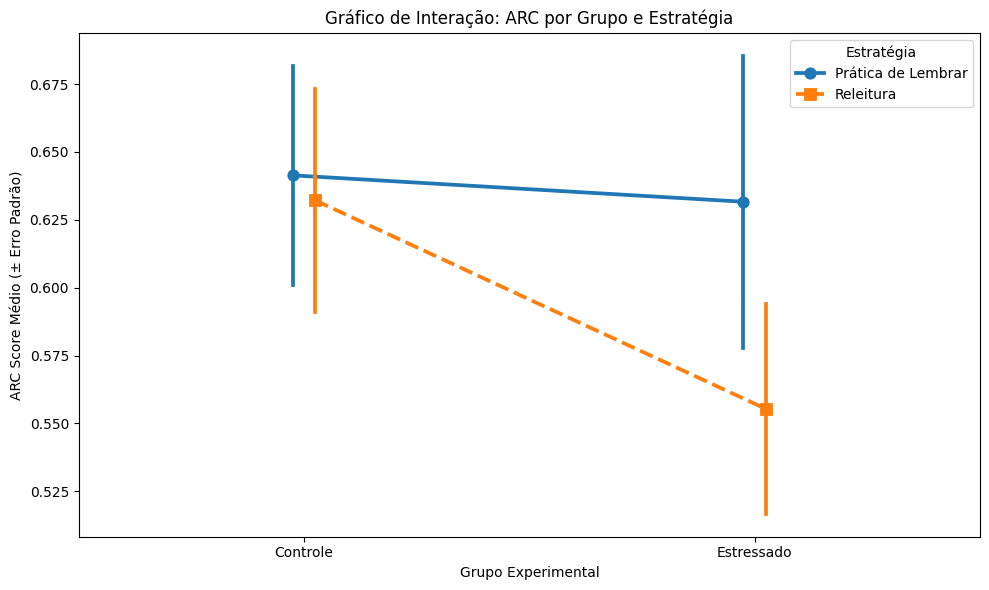

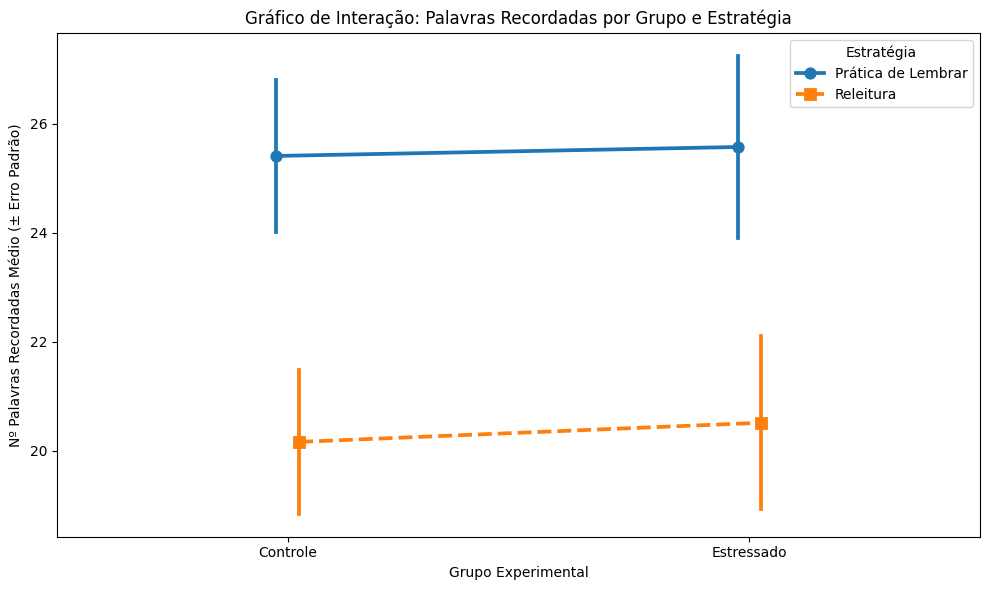

In [17]:
print("\n--- Visualizações dos Resultados Principais ---")

# Gráfico de Interação para ARC
plt.figure()
sns.pointplot(x="Group_label", y="ARC", hue="Strategy_label", data=df, 
              markers=["o", "s"], linestyles=["-", "--"], dodge=True, errorbar="se")
plt.title("Gráfico de Interação: ARC por Grupo e Estratégia")
plt.xlabel("Grupo Experimental")
plt.ylabel("ARC Score Médio (± Erro Padrão)")
plt.legend(title="Estratégia")
plt.tight_layout()
# Salvo anteriormente para Excel
plt.show()

# Gráfico de Interação para Words Recalled
plt.figure()
sns.pointplot(x="Group_label", y="words_recalled", hue="Strategy_label", data=df, 
              markers=["o", "s"], linestyles=["-", "--"], dodge=True, errorbar="se")
plt.title("Gráfico de Interação: Palavras Recordadas por Grupo e Estratégia")
plt.xlabel("Grupo Experimental")
plt.ylabel("Nº Palavras Recordadas Médio (± Erro Padrão)")
plt.legend(title="Estratégia")
plt.tight_layout()
# Salvo anteriormente para Excel
plt.show()

## 10. Análise de Outliers (Placeholder)

Esta seção é reservada para a análise e tratamento de outliers.

*   Identificar outliers (ex: Z-score > 3 ou critério baseado em IQR).
*   Analisar o impacto dos outliers nos resultados.
*   Decidir sobre o tratamento (manter, remover, transformar) e justificar.

*(A implementação será definida após discussão com o usuário).*

In [18]:
# Placeholder para código de análise de outliers
print("\n--- Análise de Outliers (a ser definida) ---")

# Exemplo: Identificação via Z-score
# from scipy.stats import zscore
# numeric_cols = ["ARC", "words_recalled", "BAIdelta", "PANASneg_delta"]
# z_scores = df[numeric_cols].apply(zscore)
# outliers = (np.abs(z_scores) > 3).any(axis=1)
# print(f"Número de participantes identificados como outliers (Z > 3): {outliers.sum()}")
# print("IDs dos outliers:", df.loc[outliers, "code"].tolist())

# Próximos passos: Discutir critérios e tratamento.


--- Análise de Outliers (a ser definida) ---


## 11. Conclusão e Resumo dos Achados

Resumo dos principais resultados estatísticos, considerando os p-valores corrigidos e os tamanhos de efeito.

*   Eficácia da manipulação de estresse.
*   Efeitos principais de Grupo e Estratégia na memória (ARC e palavras recordadas).
*   Ausência de interação significativa Grupo × Estratégia.
*   Resultados das comparações planejadas (efeito do estresse dentro de cada estratégia).
*   Implicações e próximos passos.

In [19]:
# Placeholder para resumo textual ou tabelas finais
print("\n--- Conclusão e Resumo dos Achados (a ser preenchido) ---")

# Exemplo: Criar tabela resumo
# summary_table = ...
# print(summary_table)


--- Conclusão e Resumo dos Achados (a ser preenchido) ---


In [20]:
# --- Salvar Resultados em Excel e CSV ---
output_excel = r"D:\PhD_Jupyter\files\data\analysis\resultados_analises_phd.xlsx"
output_csv = r"D:\PhD_Jupyter\files\data\analysis\resultados_analises_phd.csv"
# Salvar DataFrame principal (ex: df) em Excel e CSV
try:
    df.to_excel(output_excel, index=False)
    df.to_csv(output_csv, index=False)
    print(f"Resultados salvos em {output_excel} e {output_csv}")
except NameError:
    print("DataFrame 'df' não encontrado. Verifique o nome do DataFrame a ser salvo.")

Resultados salvos em D:\PhD_Jupyter\files\data\analysis\resultados_analises_phd.xlsx e D:\PhD_Jupyter\files\data\analysis\resultados_analises_phd.csv
